In [ ]:
#use anim kernal

In [1]:
from matplotlib import pyplot as plt 
import numpy as np 
from matplotlib.animation import FuncAnimation 
from scipy.signal import detrend, butter, filtfilt, convolve, welch
from IPython.display import HTML



In [2]:
%matplotlib inline 

In [ ]:
# #Simple sine wave animation 

# # initializing a figure in 
# # which the graph will be plotted 
# fig = plt.figure() 

# # marking the x-axis and y-axis 
# axis = plt.axes(xlim =(0, 4), 
# 				ylim =(-2, 2)) 

# # initializing a line variable 
# line, = axis.plot([], [], lw = 3) 

# # data which the line will 
# # contain (x, y) 
# def init(): 
# 	line.set_data([], []) 
# 	return line, 

# def animate(i): 
# 	x = np.linspace(0, 4, 1000) 

# 	# plots a sine graph 
# 	y = np.sin(2 * np.pi * (x - 0.01 * i)) 
# 	line.set_data(x, y) 
	
# 	return line, 

# anim = FuncAnimation(fig, animate, init_func = init, 
# 					frames = 200, interval = 20, blit = True) 


# # anim.save('continuousSineWave.mp4', 
# # 		writer = 'ffmpeg', fps = 30) 

# anim.save('/Users/morganfitzgerald/Desktop/continuousSineWave.mp4', writer='ffmpeg', fps=30)


# plt.show()

# Build ECG sig

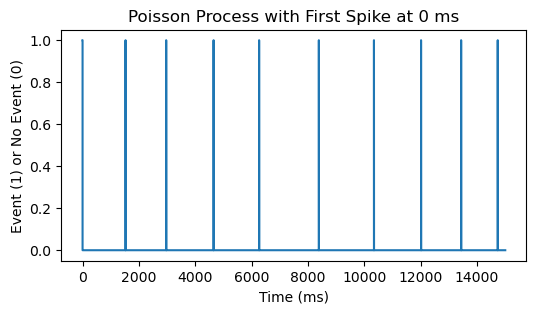

Cycle count: 10.0


In [3]:
#Poisson process
# Set the rate parameter (average events per unit time)
rate_parameter = 0.002  # Adjust this value as needed

# Set the time range (0 to ____ ms)
time_range = np.arange(0, 15000)

# Initialize an array to store the Poisson process
poisson_process = np.zeros(len(time_range))

# Set the minimum time interval between spikes (refractory period)
min_spike_interval = 900

# Start with a spike at time 0
poisson_process[0] = 1
last_spike_time = 0  # Initialize with the first spike at time 0

# Generate Poisson process with refractory period
for i in range(1, len(time_range)):  # Start from 1 since 0 is already a spike
    if np.random.poisson(rate_parameter) > 0 and (time_range[i] - last_spike_time) >= min_spike_interval:
        poisson_process[i] = 1
        last_spike_time = time_range[i]

# Plot the Poisson process
plt.figure(figsize=(6, 3))
plt.step(time_range, poisson_process, where='post')
plt.xlabel('Time (ms)')
plt.ylabel('Event (1) or No Event (0)')
plt.title('Poisson Process with First Spike at 0 ms')
plt.show()

# Print the spike count
spike_count = np.sum(poisson_process)
print("Cycle count:", spike_count)


In [4]:
# #Real / Original Gaussian Params 
gaussian_params = np.array([ 5.00000000e+01, 1.86660441e+03, 1.79841848e+01, 
                                 1.51461650e+02, -8.16814518e+02, 7.71994180e+00, 
                                 1.85637028e+02, 3.18867419e+04, 1.13499461e+01,
                                 2.15193654e+02, -5.20392350e+03,6.11511696e+00,
                                4.92442009e+02, 9.51070840e+03, 4.08261600e+01])

# Calculate the shift required for P wave
p_center_shift = 50 - gaussian_params[0]

# Apply the same shift to all center values
gaussian_params[0::3] += p_center_shift

# Define the Gaussian function
def gaussian_function(x, center, height, width):
    gaussian_wave = height * np.exp(-(x - center)**2 / (2 * width**2))
    return gaussian_wave

# Create the ECG cycle signal with aligned center values
xs = np.arange(0, 700)
waveforms = np.array([gaussian_function(xs, *gaussian_params[i:i+3]) for i in range(0, len(gaussian_params), 3)])
one_sig = np.sum(waveforms, axis=0)

# Calculate the Power Spectral Density (PSD) using Welch's method
#Simple Welch Input
fs = 1000  # Sampling frequency (Hz)
nperseg = 512  # Example window length
noverlap = 256  # Example overlap percentage

f, Pxx = welch(one_sig, fs=1000, nperseg=nperseg, noverlap=noverlap)

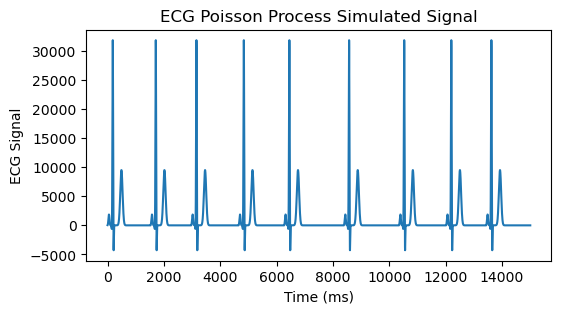

In [5]:
#Building our ECG Simulated Sig with Poisson Process Input

# Define the length of the signals
signal_length = len(poisson_process) # in ms
ecg_cycle_length = len(one_sig) # in ms

# Generate a zero signal
poisson_sig = np.zeros(signal_length)

# # Generate a Poisson process 

# Find indices where the Poisson process is equal to 1
trigger_indices = np.where(poisson_process == 1)[0]

# Insert the ECG cycle at each trigger index
for index in trigger_indices:
    if index + ecg_cycle_length <= signal_length:
        poisson_sig[index:index + ecg_cycle_length] = one_sig

# Plot the resulting ECG signal

plt.figure(figsize=(6, 3))

plt.plot(poisson_sig)
# plt.plot(poisson_sig)
plt.xlabel('Time (ms)')
plt.ylabel('ECG Signal')
plt.title('ECG Poisson Process Simulated Signal')
plt.show()

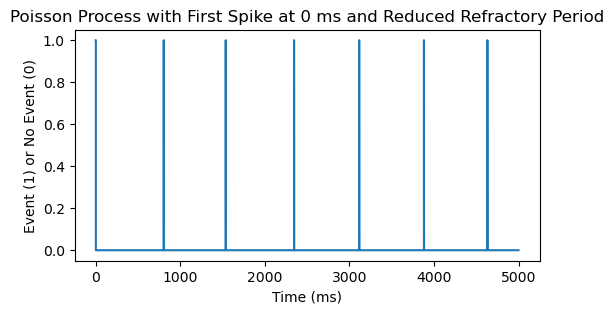

Cycle count: 7.0


In [9]:

# Faster ECG

#process

# Set the rate parameter (average events per unit time)
rate_parameter = 0.009  # Adjusted for a faster rate

# Set the time range (0 to ____ ms)
time_range = np.arange(0, 5000)

# Initialize an array to store the fast Poisson process
poisson_process = np.zeros(len(time_range))

# Set the minimum time interval between spikes (refractory period)
min_spike_interval = 700  # Reduced for a faster frequency of events

# Start with a spike at time 0
poisson_process[0] = 1
last_spike_time = 0  # Initialize with the first spike at time 0

# Generate fast Poisson process with refractory period
for i in range(1, len(time_range)):  # Start from 1 since 0 is already a spike
    if np.random.poisson(rate_parameter) > 0 and (time_range[i] - last_spike_time) >= min_spike_interval:
        poisson_process[i] = 1
        last_spike_time = time_range[i]

# Plot the fast Poisson process
plt.figure(figsize=(6, 3))
plt.step(time_range, poisson_process, where='post')
plt.xlabel('Time (ms)')
plt.ylabel('Event (1) or No Event (0)')
plt.title('Poisson Process with First Spike at 0 ms and Reduced Refractory Period')
plt.show()

# Print the spike count
spike_count = np.sum(poisson_process)
print("Cycle count:", spike_count)

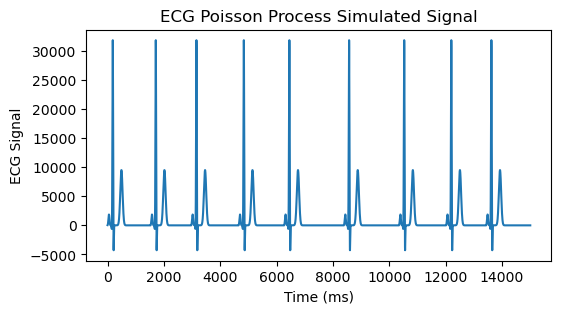

In [10]:
#Building our ECG Simulated Sig with Poisson Process Input

# Define the length of the signals
signal_length = len(poisson_process) # in ms
ecg_cycle_length = len(one_sig) # in ms

# Generate a zero signal
fast_poisson_sig = np.zeros(signal_length)

# # Generate a Poisson process 

# Find indices where the Poisson process is equal to 1
trigger_indices = np.where(poisson_process == 1)[0]

# Insert the ECG cycle at each trigger index
for index in trigger_indices:
    if index + ecg_cycle_length <= signal_length:
        fast_poisson_sig[index:index + ecg_cycle_length] = one_sig

# Plot the resulting ECG signal

plt.figure(figsize=(6, 3))

plt.plot(poisson_sig)
plt.xlabel('Time (ms)')
plt.ylabel('ECG Signal')
plt.title('ECG Poisson Process Simulated Signal')
plt.show()

## Animate the sig

### Animate individual signal

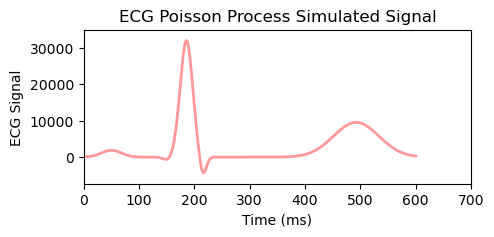

In [25]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Animation setup
fig, ax = plt.subplots(figsize=(5, 2))
line, = ax.plot([], [], lw=2, color='#ff9999')
ax.set_xlim(0, len(one_sig))
ax.set_ylim(np.min(one_sig-3000), np.max(one_sig+3000))

ax.set_xlabel('Time (ms)')
ax.set_ylabel('ECG Signal')
ax.set_title('ECG Poisson Process Simulated Signal')

def init():
    line.set_data([], [])
    return line,

def update(frame):
     line.set_data(np.arange(frame), one_sig[:frame])
     return line,

ani = FuncAnimation(fig, update, frames=np.arange(1, len(one_sig), 150), init_func=init, blit=True)

# Display the animation
HTML(ani.to_html5_video())


#### Animate whole poisson sig

In [ ]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Animation setup
fig, ax = plt.subplots(figsize=(5, 2))
line, = ax.plot([], [], lw=2, color='#ff9999')
ax.set_xlim(0, len(poisson_sig))
ax.set_ylim(np.min(poisson_sig-3000), np.max(poisson_sig+3000))

ax.set_xlabel('Time (ms)')
ax.set_ylabel('ECG Signal')
ax.set_title('ECG Poisson Process Simulated Signal')

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(np.arange(frame), poisson_sig[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=np.arange(1, len(poisson_sig), 200), init_func=init, blit=True)

# Display the animation
HTML(ani.to_html5_video())


### Animate individual signal

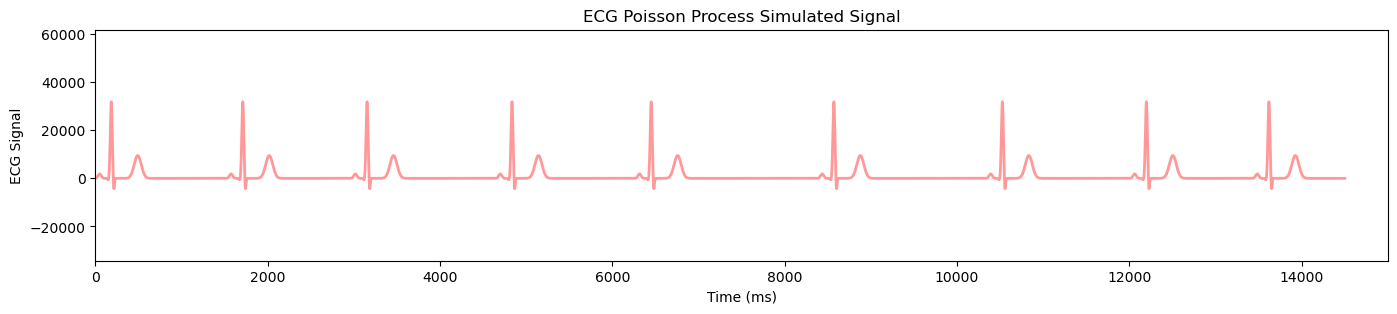

In [12]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# # Assuming 'one_sig' and 'poisson_process' are defined

# # Define the length of the signals
# signal_length = len(poisson_process)  # in ms
# ecg_cycle_length = len(one_sig)  # in ms

# # Generate a zero signal
# poisson_sig = np.zeros(signal_length)

# # Generate a Poisson process
# # Find indices where the Poisson process is equal to 1
# trigger_indices = np.where(poisson_process == 1)[0]

# # Insert the ECG cycle at each trigger index
# for index in trigger_indices:
#     if index + ecg_cycle_length <= signal_length:
#         poisson_sig[index:index + ecg_cycle_length] = one_sig

# Animation setup
fig, ax = plt.subplots(figsize=(16.68, 3))
line, = ax.plot([], [], lw=2, color='#ff9999')
ax.set_xlim(0, len(poisson_sig))
ax.set_ylim(np.min(poisson_sig-30000), np.max(poisson_sig+30000))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('ECG Signal')
ax.set_title('ECG Poisson Process Simulated Signal')

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(np.arange(frame), poisson_sig[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=np.arange(1, len(poisson_sig), 500), init_func=init, blit=True)

# Display the animation
HTML(ani.to_html5_video())


### Fast and slow ECG animation

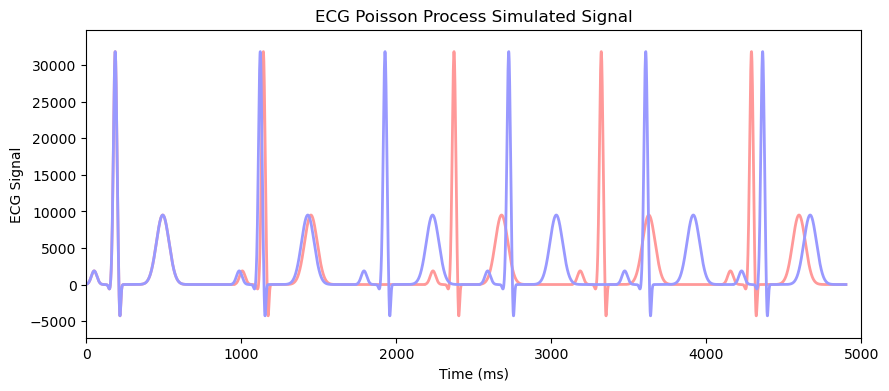

In [27]:
# Assuming 'fast_poisson_sig' is your second, faster ECG signal

# Animation setup
fig, ax = plt.subplots(figsize=(10, 4))
line1, = ax.plot([], [], lw=2, color='#ff9999')  # Original signal
line2, = ax.plot([], [], lw=2, color='#9999ff')  # Second (faster) signal, in a different color

# Adjust limits if necessary based on both signals
ax.set_xlim(0, len(poisson_sig))
ax.set_ylim(min(np.min(poisson_sig-3000), np.min(fast_poisson_sig-3000)), max(np.max(poisson_sig+3000), np.max(fast_poisson_sig+3000)))

ax.set_xlabel('Time (ms)')
ax.set_ylabel('ECG Signal')
ax.set_title('ECG Poisson Process Simulated Signal')

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

def update(frame):
    line1.set_data(np.arange(frame), poisson_sig[:frame])
    line2.set_data(np.arange(frame), fast_poisson_sig[:frame])  # Update the second line with the faster ECG data
    return line1, line2

ani = FuncAnimation(fig, update, frames=np.arange(1, max(len(poisson_sig), len(fast_poisson_sig)), 100), init_func=init, blit=True)

# Display the animation
HTML(ani.to_html5_video())


## Transparent

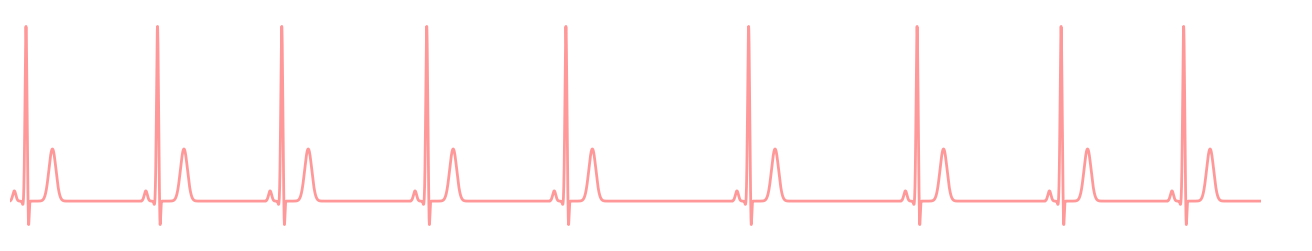

In [16]:

# Animation setup
# fig, ax = plt.subplots(figsize=(10, 4))
fig, ax = plt.subplots(figsize=(16.68, 3), dpi=100)  # Increase DPI for better quality

fig.patch.set_alpha(0)  # Make the figure background transparent
line, = ax.plot([], [], lw=2, color='#ff9999')
ax.set_xlim(0, len(poisson_sig))
ax.set_ylim(np.min(poisson_sig-3000), np.max(poisson_sig+3000))
ax.axis('off')  # Turn off the axes

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(np.arange(frame), poisson_sig[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=np.arange(1, len(poisson_sig), 500), init_func=init, blit=True)

# Display the animation
HTML(ani.to_html5_video())

## Transparent over image

In [13]:
from PIL import Image

# Correcting the path and using the Image.open method to load the image
heart_img_path = '/Users/morganfitzgerald/Desktop/heart_banner.png'  # Ensure the path is correct
heart_img = Image.open(heart_img_path)

# # Displaying the image
# heart_img.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/morganfitzgerald/Desktop/heart_banner.png'

In [22]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
from matplotlib.animation import FuncAnimation
from PIL import Image


In [18]:
# print("Starting the program...")

# # Load your image
# heart_img_path = '/Users/morganfitzgerald/Desktop/heart_banner.png'
# print("Loading the image...")
# heart_img = Image.open(heart_img_path)

# # Here you would have your poisson_sig data prepared
# # For example:
# # poisson_sig = np.random.poisson(lam=5, size=1000)
# print("Preparing the Poisson signal...")

# # Set up the figure and axis
# print("Setting up the figure and axis...")
# fig, ax = plt.subplots(figsize=(16.68, 3), dpi=550)  # Increase DPI for better quality
# fig.patch.set_alpha(0)  # Make the figure background transparent

# # Display the image
# print("Displaying the image...")
# ax.imshow(heart_img, aspect='auto', extent=[0, len(poisson_sig), np.min(poisson_sig)-3000, np.max(poisson_sig)+3000])


# # Plot the initial line
# print("Initializing the plot line...")
# # Initialize the plot line with white color
# line, = ax.plot([], [], lw=0.9, color='white')

# # Set glowing effect using path effects
# glow_effects = [
#     withStroke(linewidth=6, foreground='white', alpha=0.4),  # Outermost glow with lower alpha
#     withStroke(linewidth=4, foreground='white', alpha=0.3),
#     withStroke(linewidth=2, foreground='white', alpha=0.2),  # Inner glow with higher alpha
# ]
# line.set_path_effects(glow_effects)

# ax.set_xlim(0, len(poisson_sig))
# ax.set_ylim(np.min(poisson_sig)-3000, np.max(poisson_sig)+3000)
# ax.axis('off')  # Turn off the axes

# # Initialize the animation function
# def init():
#     print("Initializing the animation...")
#     line.set_data([], [])
#     return line,

# # Update the animation function
# def update(frame):
#     print(f"Animating frame {frame}...")
#     line.set_data(np.arange(frame), poisson_sig[:frame])
#     return line,

# # Create the animation
# print("Creating the animation... This may take a while.")
# ani = FuncAnimation(fig, update, frames=np.arange(1, len(poisson_sig), 800), init_func=init, blit=True)

# print("Animation complete!")


# # Save the animation
# print("Saving the animation...")
# ani.save('heart_banner_animation.mp4', writer='ffmpeg', dpi=550)


# # To display in a Jupyter Notebook, you could use:
# # from IPython.display import HTML
# print("Rendering the animation for display...")
# HTML(ani.to_html5_video())


In [15]:
from moviepy.editor import VideoFileClip
from moviepy.video.fx.speedx import speedx

# Load your video
video = VideoFileClip('/Users/morganfitzgerald/Desktop/download.mp4')

# Accelerate the video by a factor of 2 using the correct method
accelerated_video = speedx(video, factor=6)

# Save the accelerated video
# accelerated_video.write_videofile('accelerated.mp4')
accelerated_video.write_videofile('/Users/morganfitzgerald/Desktop/accelerated_video.mp4')



Moviepy - Building video /Users/morganfitzgerald/Desktop/accelerated_video.mp4.
Moviepy - Writing video /Users/morganfitzgerald/Desktop/accelerated_video.mp4



Moviepy - Done !
Moviepy - video ready /Users/morganfitzgerald/Desktop/accelerated_video.mp4


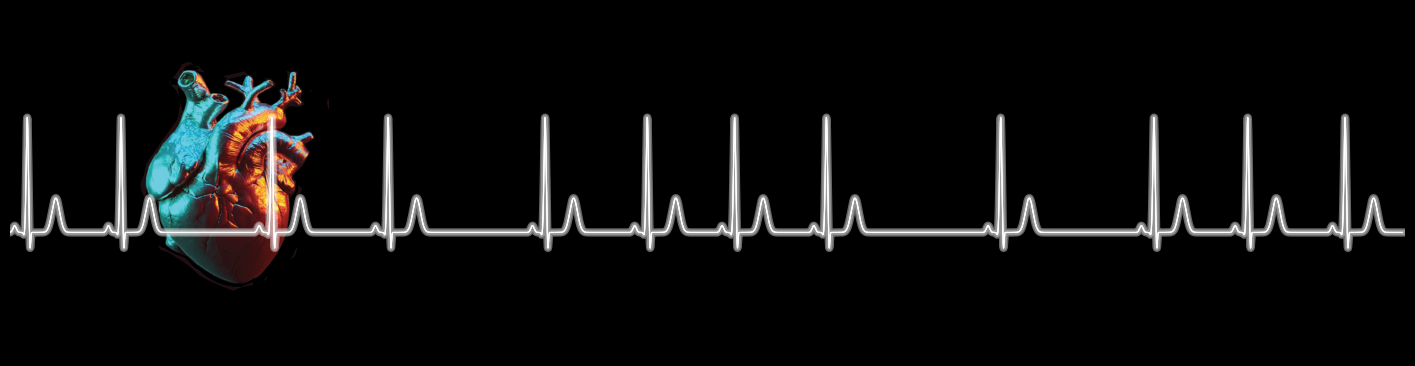

In [30]:
# from matplotlib import pyplot as plt
# from matplotlib.animation import FuncAnimation, PillowWriter
# from IPython.display import HTML
# import numpy as np
# from PIL import Image

# Load the image
heart_img_path = '/Users/morganfitzgerald/Desktop/heart_banner.png'  # Update to the correct path
heart_img = Image.open(heart_img_path)

# Assuming 'poisson_sig' is defined
# For demonstration, let's create a dummy signal
# poisson_sig = np.random.normal(size=1000)  # Example signal

# Set up the figure
fig, ax = plt.subplots(figsize=(18, 4.5))
fig.patch.set_facecolor('black')  # Set the outer color
ax.set_facecolor('black')  # Set the plot area color


# Display the image
ax.imshow(heart_img, extent=[0, len(poisson_sig), np.min(poisson_sig-30000), np.max(poisson_sig+30000)], aspect='auto')

# Make axes transparent
ax.set_frame_on(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Plot the initial line over the image
line, = ax.plot([], [], lw=0.8, color='white')  # Using white for visibility

# Set glowing effect using path effects
glow_effects = [
    withStroke(linewidth=6, foreground='white', alpha=0.4),  # Outermost glow with lower alpha
    withStroke(linewidth=4, foreground='white', alpha=0.3),
    withStroke(linewidth=2, foreground='white', alpha=0.1),  # Inner glow with higher alpha
]
line.set_path_effects(glow_effects)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(np.arange(frame), poisson_sig[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=np.arange(1, len(poisson_sig), 30), init_func=init, blit=True)

# Convert the animation to HTML5 video and display
ani_video = HTML(ani.to_html5_video())

# Display the animation
ani_video
